<a href="https://colab.research.google.com/github/LammyG/HDSC-practical-time-series/blob/main/practical_time_series_(cont'd).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
from fbprophet import Prophet
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")

In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.rename(columns={"Month": "ds", "Passengers": "y" })
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df)

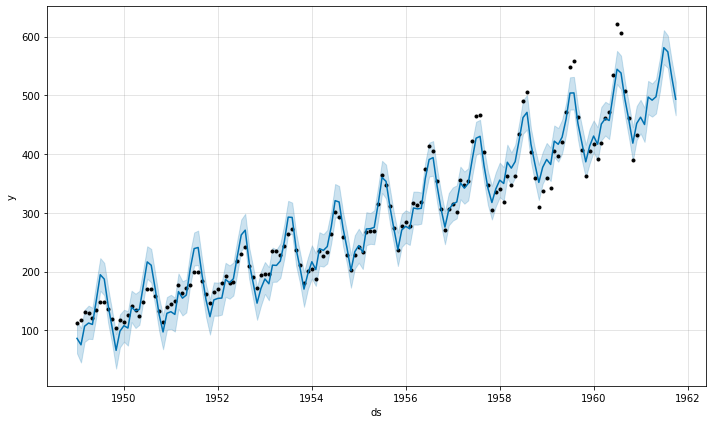

In [6]:
#predict for the next 10months
future = model.make_future_dataframe(periods=10, freq='M')
forecast = model.predict(future)
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the lower and upper boundaries
model.plot(forecast)
plt.show()